In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder
from IPython.display import display

pipeline = ProcessingPipelineBuilder.fromBlank(size=(512, 768)) \
            .drawCheckerboard()

image = pipeline()
display(image.getViewportImage())

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder, RandomChoiceArgument
from PIL import Image
from IPython.display import display

pipeline = ProcessingPipelineBuilder.fromBlank(size=(512, 768)) \
            .drawShapeGeometry(shapes=3, foreground=RandomChoiceArgument(["black", "darkgrey"])) \
            .symmetrize(symmetry=RandomChoiceArgument(["horizontal", "vertical", "rotation", "none"])) \
            .fillBackground(background = "white")

image = pipeline()
display(image.getViewportImage())

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder
from PIL import Image
from IPython.display import display


pipeline = ProcessingPipelineBuilder.fromBlank(size=(512, 768)) \
            .drawShapeGeometry(shapes=3, foreground="black", outline="white", maxsize = 96) \
            .spiralize(steps = 16) \
            .fillBackground(background = "black")

image = pipeline()
display(image.getViewportImage())

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder, SaturationProcessor, GaussianBlurProcessor, GaussianNoiseProcessor
from PIL import Image
from IPython.display import display


pipeline = ProcessingPipelineBuilder.fromBlank(size=(512, 768)) \
            .drawCheckerboard(background="lightgreen", foreground="magenta", blocksize=(512//3, 768//3), start = "white")
pipeline.addTask(SaturationProcessor(saturation=-0.5))
pipeline.addTask(GaussianNoiseProcessor(sigma=10))
pipeline.addTask(GaussianBlurProcessor(radius=2))
image = pipeline()

display(image.getViewportImage())

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder, SimpleTransformProcessor, InitImageProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/test.png")

pipeline = ProcessingPipelineBuilder.fromImage(image) \
            .simpleTransform(transform="flipvertical")

image = pipeline()
display(image.getViewportImage())


In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ImageProcessorPipeline, CannyEdgeProcessor, InitImageProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/rabbit.png")

geometry = ImageProcessorPipeline()
geometry.addTask(InitImageProcessor(image))
geometry.addTask(CannyEdgeProcessor())

image = geometry()
display(image.getViewportImage())

/Users/rob/anaconda3/envs/sd/lib/python3.11/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


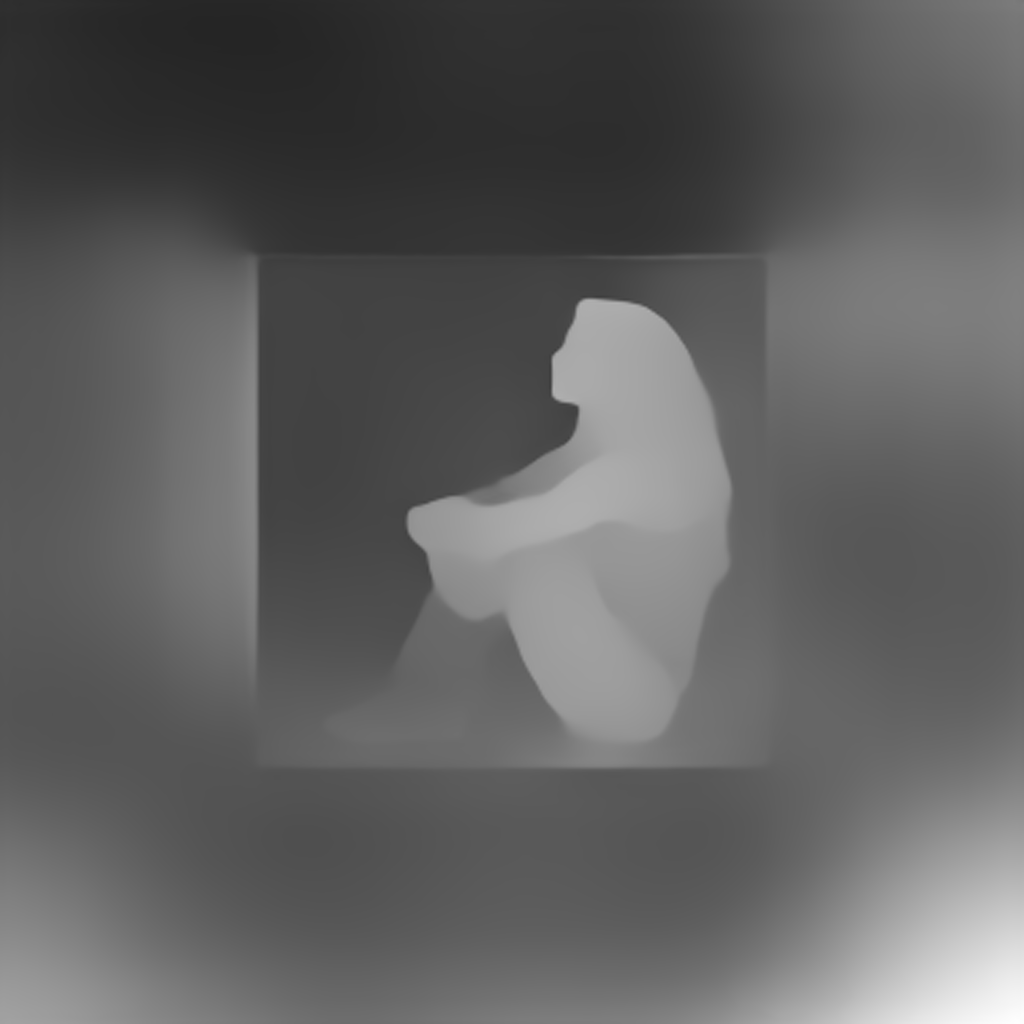

(1024, 1024)


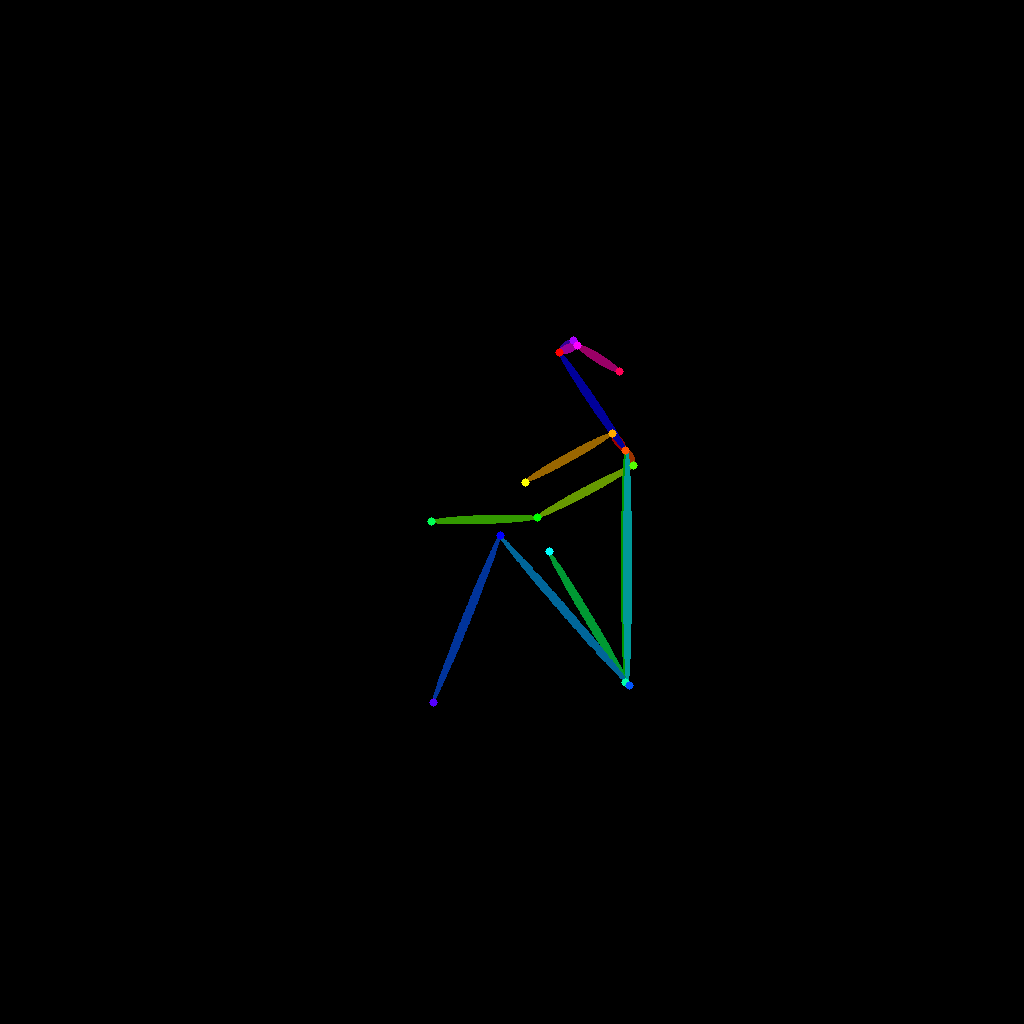

(1024, 1024)


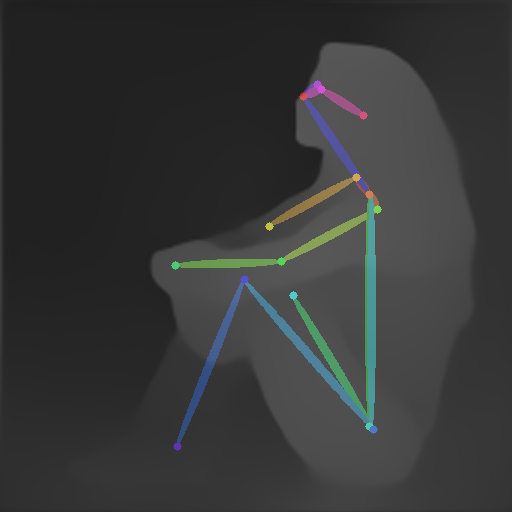

In [1]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( ImageProcessorPipeline, DepthEstimationProcessor, NormalEstimationProcessor, SegmentationProcessor, 
                         HEDEdgeDetectionProcessor, MLSDStraightLineDetectionProcessor, PoseDetectionProcessor, ContentShuffleProcessor, 
                         PIDIEdgeDetectionProcessor, InitImageProcessor, CompositeProcessor, ResizeProcessor )
from PIL import Image
from IPython.display import display

image = Image.open("data/pose.png")

geometry = ImageProcessorPipeline(oversize=0)
geometry.addTask(InitImageProcessor(image))
geometry.addTask(ResizeProcessor(size=(512, 512)))
geometry.addTask(DepthEstimationProcessor().setInputIndexes([1]))
geometry.addTask(PoseDetectionProcessor().setInputIndexes([1]))
# geometry.addTask(NormalEstimationProcessor())
# geometry.addTask(SegmentationProcessor())
# geometry.addTask(HEDEdgeDetectionProcessor())
# geometry.addTask(MLSDStraightLineDetectionProcessor())
# geometry.addTask(ContentShuffleProcessor())
# geometry.addTask(PIDIEdgeDetectionProcessor())
geometry.addTask(CompositeProcessor().setInputIndexes([2,3]))

image = geometry()
display(image.getViewportImage())

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( ProcessingPipelineBuilder, ImageProcessorPipeline, DrawGeometricSpiralProcessor, RandomChoiceArgument, FillBackgroundProcessor )
from PIL import Image
from IPython.display import display

pipeline = (
    ProcessingPipelineBuilder.fromBlank()
            # .fillBackground(background = "black")
            .drawGeometricSpiral(rect=RandomChoiceArgument([(0, 0, 1, 0.5), (0, 0, 0.5, 1)]))
            .symmetrize(symmetry=RandomChoiceArgument(["rotation"]))
            .fillBackground(background = "black")
)

image = pipeline()
display(image.getViewportImage())

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( ProcessingPipelineBuilder, ImageProcessorPipeline, DrawGeometricSpiralProcessor, RandomChoiceArgument, FillBackgroundProcessor )
from PIL import Image
from IPython.display import display

pipeline = (
    ProcessingPipelineBuilder.fromBlank(size=(512, 768))
                             .drawGeometricSpiral(rect=(0, 0, 1, 0.5), draw=(False, True))
                             .symmetrize(symmetry=RandomChoiceArgument(["rotation", "horizontal"]))
                             .fillBackground(background = "black")
)

image = pipeline()
display(image.getViewportImage())

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( RandomChoiceArgument, RandomImageArgument, ProcessingPipelineBuilder )
from PIL import Image
from IPython.display import display

pipeline = ProcessingPipelineBuilder.fromImage(RandomImageArgument.fromDirectory('/Users/rob/GoogleDrive/stable-diffusion/initimages/oscilloscope')) \
            .simpleTransform(transform = RandomChoiceArgument(["fliphorizontal", "flipvertical", "rotate90", "rotate180", "rotate270", "none"])) \
            .resize(resizetype=RandomChoiceArgument(["stretch", "extend"]), 
                    size=RandomChoiceArgument([(512, 768), (768, 512)]),
                    halign=RandomChoiceArgument(["left", "right", "centre"]), 
                    valign=RandomChoiceArgument(["top", "bottom", "centre"]), fill="black"
            )

image = pipeline()
display(image.getViewportImage())

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( PlaceholderArgument, RandomChoiceArgument, RandomImageArgument, ProcessingPipelineBuilder )
from PIL import Image
from IPython.display import display

pipeline = ProcessingPipelineBuilder.fromImage(PlaceholderArgument("image")) \
            .simpleTransform(transform = RandomChoiceArgument(["fliphorizontal", "flipvertical", "rotate90", "rotate180", "rotate270", "none"])) \
            .resize(resizetype=RandomChoiceArgument(["stretch", "extend", "fit"]), 
                    size=PlaceholderArgument("size"),
                    halign=RandomChoiceArgument(["left", "right", "centre"]), 
                    valign=RandomChoiceArgument(["top", "bottom", "centre"]), fill="black"
            )

pipeline.setPlaceholder("image", RandomImageArgument.fromDirectory('/Users/rob/GoogleDrive/stable-diffusion/initimages/oscilloscope'))
pipeline.setPlaceholder("size", (768, 256))

image = pipeline()
display(image.getViewportImage())

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder
from PIL import Image
from IPython.display import display

from diffuserslib import DrawVoronoiDiagramProcessor, edge_power_distribution
import numpy as np
from functools import partial

# points = edge_power_distribution(a=8, size=(100, 2))
points = np.random.uniform(low=0, high=1, size=(50, 2))
# points = np.random.triangular(left=0, mode=0, right=1, size=(50, 2))
# points = np.random.exponential(scale=0.2, size=(50, 2))
# points = np.random.power(a=8, size=(50, 2))
# points = partial(np.random.normal, loc=0.5, scale=0.15, size=(50, 2))
# points = np.random.normal(loc=0.5, scale=0.15, size=(50, 2))

pipeline = ( 
    ProcessingPipelineBuilder.fromBlank(size=(768, 512))
                             .addTask(DrawVoronoiDiagramProcessor(points = points, 
                                                                  draw=(True, True, True), 
                                                                  outline="white",
                                                                  lineProbablity=1))
                             .fillBackground(background = "black")
)

image = pipeline()
display(image.getViewportImage())